In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.compose import ColumnTransformer
from imblearn.ensemble import BalancedBaggingClassifier , BalancedRandomForestClassifier

In [3]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [4]:
X = dataset.iloc[:, 3:]

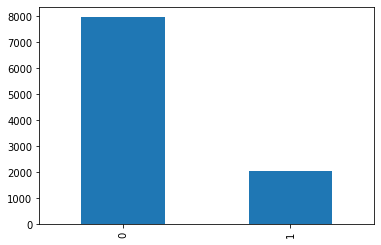

In [5]:
X.Exited.value_counts().plot(kind='bar')

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#label encoding of catigorical varials using OrdinalEncoder
oe = OrdinalEncoder(dtype=np.int32)
df_1 = oe.fit_transform(X[['Geography', 'Gender']])
df_2 = pd.DataFrame(data=df_1, columns=['Geography', 'Gender'])

In [14]:
df_2.head()

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0


In [15]:
df1= X.drop(['Geography', 'Gender'], axis=1)
df = pd.concat([df_2, df1], axis=1)

In [16]:
df.head()

,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,2,0,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,2,0,850,43,2,125510.82,1,1,1,79084.10,0


In [17]:
data = df.iloc[:,:-1]
label= df.iloc[:,-1]

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 0, stratify=label)

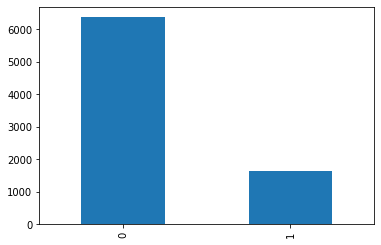

In [19]:
_=y_train.value_counts().plot(kind='bar')

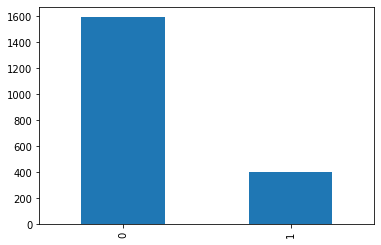

In [20]:
_=y_test.value_counts().plot(kind='bar')

In [21]:
# calculate f2 score
def f2_make(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [22]:
f2 = make_scorer(f2_make)

In [28]:
#using random forest, perfomace is not good, my focus is on recall of 1's in this problem statemet along is fairly good 
# recall of 0's, hence used F2 score.
RF = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=101)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [24]:
from imblearn.ensemble import BalancedRandomForestClassifier

Using TensorFlow backend.


In [25]:
model = BalancedRandomForestClassifier()
model.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='gini', max_depth=None,
                               max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [26]:
y_pred = model.predict(X_test)

In [27]:
# with balace random forest performance is very good as i have used many algo on this proble, BRF performance is best so far
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



In [29]:
#hyper tunning RAndom forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 240, num = 9)]
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [30]:
# Create the random grid
param_grid = {'rf__n_estimators': n_estimators,
               'rf__criterion' : criterion,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

In [31]:
param_grid

{'rf__n_estimators': [80, 100, 120, 140, 160, 180, 200, 220, 240],
 'rf__criterion': ['gini', 'entropy'],
 'rf__max_features': ['log2', 'sqrt'],
 'rf__max_depth': [10, 20, 30, 40, 50, 60, None],
 'rf__min_samples_split': [2, 5, 8],
 'rf__min_samples_leaf': [1, 2, 4],
 'rf__bootstrap': [True, False]}

In [32]:
RF = RandomForestClassifier(class_weight='balanced', random_state=101)
estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('rf', RF))
pipeline = Pipeline(estimators)

In [33]:
rf_random = RandomizedSearchCV(estimator = pipeline, param_distributions = param_grid, n_iter = 80, cv = 7, 
                               verbose=2, random_state=42, scoring = f2, n_jobs = -1)

In [34]:
%%time
grid_result = rf_random.fit(X_train, y_train)

Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  8.8min finished


Wall time: 8min 51s


In [35]:
rf_random.best_score_

0.6570049638985735

In [36]:
rf_random.best_params_

{'rf__n_estimators': 180,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 2,
 'rf__max_features': 'log2',
 'rf__max_depth': 10,
 'rf__criterion': 'entropy',
 'rf__bootstrap': False}

In [37]:
random_forest = RandomForestClassifier(n_estimators= 180, min_samples_split = 5, min_samples_leaf = 2, max_features ='log2',
                                      max_depth = 10, criterion= 'entropy', bootstrap = False, class_weight='balanced')

In [38]:
model_rf = random_forest.fit(X_train, y_train)

In [39]:
pred_y = model_rf.predict(X_test)

In [96]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.68      0.61       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.75      2000
weighted avg       0.84      0.82      0.83      2000



In [42]:
f2_make(y_test,pred_y)

0.6481916392672615

In [97]:
pred_y = rf_random.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1593
           1       0.54      0.68      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.82      2000



In [43]:
#Our concentration should more on recall in churn prediction, especially on 1’s recall, 
#Need to maximize recall i.e. to reduce false negative (falsely predicted churned customer as negative), so that bank can provide some offers to the customer.
#There is more scope of performance improvement by using more set of hyper parameters
#My focus was on hyper parameter tuning so escaped data exploratory analysis, feature engineering, feature extraction, feature selection steps.	

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [45]:
LR = LogisticRegression(solver='liblinear', class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(LR, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   14.8s finished


In [46]:
np.mean(scores)

0.5696503023500009

In [48]:
from imblearn.ensemble import BalancedBaggingClassifier , BalancedRandomForestClassifier

In [49]:
BBC = BalancedBaggingClassifier(n_estimators=80, bootstrap_features=True, max_features=0.8, max_samples=0.5, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(BBC, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\OF65\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.1min finished


In [50]:
np.mean(scores)

0.6552949582303954

In [51]:
BBC = BBC.fit(X_train, y_train)

In [52]:
y_pred = BBC.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.51      0.67      0.58       407

    accuracy                           0.80      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.80      0.81      2000



In [54]:
y_pred_train = BBC.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6370
           1       0.73      0.98      0.84      1630

    accuracy                           0.92      8000
   macro avg       0.86      0.94      0.89      8000
weighted avg       0.94      0.92      0.93      8000



In [55]:
# balanced random forest
BRF = BalancedRandomForestClassifier(n_estimators= 100, min_samples_split = 5, min_samples_leaf = 2, max_features ='log2',
                                      max_depth = 40, criterion= 'entropy', bootstrap = True)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(BRF, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.8min finished


In [56]:
np.mean(scores)

0.6839215524860168

In [57]:
BRF.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='entropy', max_depth=40,
                               max_features='log2', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=5,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [58]:
y_pred = BRF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.49      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



In [59]:
y_pred_train = BRF.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      6370
           1       0.63      0.97      0.76      1630

    accuracy                           0.88      8000
   macro avg       0.81      0.91      0.84      8000
weighted avg       0.92      0.88      0.88      8000



In [60]:
BRF = BalancedRandomForestClassifier(n_estimators= 100, min_samples_split = 5, min_samples_leaf = 2, max_features ='log2',
                                       criterion= 'entropy', bootstrap = True, replacement=True)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(BRF, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.8min finished


In [61]:
np.mean(scores)

0.6875004897618908

In [62]:
BRF.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                               criterion='entropy', max_depth=None,
                               max_features='log2', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=5,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=True, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [63]:
y_pred = BRF.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      1593
           1       0.47      0.74      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



In [64]:
y_pred_train = BRF.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6370
           1       0.61      0.98      0.75      1630

    accuracy                           0.87      8000
   macro avg       0.80      0.91      0.83      8000
weighted avg       0.91      0.87      0.88      8000



In [ ]:
#balanced adaboost
from imblearn.ensemble import EasyEnsembleClassifier
EEC = EasyEnsembleClassifier(n_estimators=60, replacement=True, n_jobs=-1, verbose=2)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(EEC, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)

In [ ]:
np.mean(scores)

In [ ]:
EEC = EasyEnsembleClassifier(n_estimators=30, replacement=True, n_jobs=-1, verbose=2, sampling_strategy='auto')
EEC.fit(X_train, y_train)

In [ ]:
y_pred = EEC.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
y_pred_train = EEC.predict(X_train)
print(classification_report(y_train,y_pred_train))

In [ ]:
rf = RandomForestClassifier(n_estimators= 100, verbose=2 , bootstrap = True, class_weight='balanced', n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=30, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1, verbose=2)                     

In [ ]:
np.mean(scores)

In [65]:
from imblearn.pipeline import Pipeline

In [66]:
#BalancedRandomForestClassifier hyper tunning
# Number of trees in random forest
n_estimators = [80,100,130,160]
criterion = ['gini', 'entropy']
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,8,10,15]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
replacement = [True, False]
class_weight = ['balanced', None]


# Create the random grid
param_grid = {'brf__n_estimators': n_estimators,
               'brf__criterion' : criterion,
               'brf__max_features': max_features,
               'brf__max_depth': max_depth,
               'brf__min_samples_split': min_samples_split,
               'brf__min_samples_leaf': min_samples_leaf,
               'brf__bootstrap': bootstrap,
               'brf__replacement' : replacement,
               'brf__class_weight' : class_weight}

In [67]:
param_grid

{'brf__n_estimators': [80, 100, 130, 160],
 'brf__criterion': ['gini', 'entropy'],
 'brf__max_features': ['log2', 'sqrt'],
 'brf__max_depth': [5, 8, 10, 15, None],
 'brf__min_samples_split': [2, 5, 8],
 'brf__min_samples_leaf': [2, 4],
 'brf__bootstrap': [True, False],
 'brf__replacement': [True, False],
 'brf__class_weight': ['balanced', None]}

In [68]:
BRF = BalancedRandomForestClassifier()
estimators = []
#estimators.append(('standardize', StandardScaler()))
estimators.append(('brf', BRF))
pipeline_imlearn = Pipeline(estimators)

In [69]:
brf_random = RandomizedSearchCV(estimator = pipeline_imlearn, param_distributions = param_grid, n_iter = 80, cv = 7, 
                               verbose=2, random_state=42, scoring = f2, n_jobs = -1)

In [70]:
%%time
grid_result1 = brf_random.fit(X_train, y_train)

Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:  4.1min finished


Wall time: 4min 6s


In [71]:
grid_result1.best_score_

0.6986012335442054

In [72]:
grid_result1.best_params_

{'brf__replacement': False,
 'brf__n_estimators': 100,
 'brf__min_samples_split': 2,
 'brf__min_samples_leaf': 2,
 'brf__max_features': 'log2',
 'brf__max_depth': 15,
 'brf__criterion': 'gini',
 'brf__class_weight': 'balanced',
 'brf__bootstrap': True}

In [92]:
brf= BalancedRandomForestClassifier(replacement=False, n_estimators=100, min_samples_split=2, min_samples_leaf=2, 
                             max_features='log2', max_depth=15, criterion='gini', class_weight='balanced', bootstrap=True)

In [93]:
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight='balanced',
                               criterion='gini', max_depth=15,
                               max_features='log2', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=100,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [94]:
y_pred = brf.predict(X_test)
print(classification_report(y_test,y_pred))
print(f2_make(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1593
           1       0.41      0.80      0.54       407

    accuracy                           0.72      2000
   macro avg       0.67      0.75      0.67      2000
weighted avg       0.83      0.72      0.75      2000

0.6728395061728394


In [95]:
y_pred = brf.predict(X_train)
print(classification_report(y_train,y_pred))
print(f2_make(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      6370
           1       0.52      1.00      0.68      1630

    accuracy                           0.81      8000
   macro avg       0.76      0.88      0.77      8000
weighted avg       0.90      0.81      0.83      8000

0.8417839403973508


In [87]:
#overfitted, so reducing n_estimators
brf= BalancedRandomForestClassifier(replacement=False, n_estimators=50, min_samples_split=2, min_samples_leaf=2, 
                             max_features='log2', max_depth=8, criterion='gini', class_weight='balanced', bootstrap=True)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight='balanced',
                               criterion='gini', max_depth=8,
                               max_features='log2', max_leaf_nodes=None,
                               min_impurity_decrease=0.0, min_samples_leaf=2,
                               min_samples_split=2,
                               min_weight_fraction_leaf=0.0, n_estimators=50,
                               n_jobs=1, oob_score=False, random_state=None,
                               replacement=False, sampling_strategy='auto',
                               verbose=0, warm_start=False)

In [90]:
y_pred = brf.predict(X_test)
print(classification_report(y_test,y_pred))
print(f2_make(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      1593
           1       0.30      0.92      0.46       407

    accuracy                           0.55      2000
   macro avg       0.63      0.69      0.54      2000
weighted avg       0.83      0.55      0.59      2000

0.656195462478185


In [91]:
y_pred = brf.predict(X_train)
print(classification_report(y_train,y_pred))
print(f2_make(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.48      0.65      6370
           1       0.33      0.98      0.49      1630

    accuracy                           0.58      8000
   macro avg       0.66      0.73      0.57      8000
weighted avg       0.86      0.58      0.62      8000

0.7017313746065058


In [ ]:
# best result found with BalancedRandomForestClassifier, both train and test performace is almost same.